# Formulae

This chapter introduces finite difference formulae for the first and second derivative, which are found from Taylor's series. After completing this chapter you should:

* Recognise the forward and central difference formule for the first and second derivatives, and state their order of accuracy

* Be able to implement the forward and central difference formulae to numerically estimate first and second derivatives


## General idea


We can derive other finite difference formulas from Taylor's series, by taking weighted sums of expansions about different points to eliminate unwanted terms in the series. Some of them are favoured because they exhibit higher order accuracy than Euler's formula {eq}`eeulerr`, whilst others may be favoured in practical applications for their numeric stability, computational efficiency or ease of practical implementation. 

A few examples of finite difference formulas are given below, though this list is far from exhaustive. You may notice that the forward, backward and central differences formulae are simply location-shifted versions of each other. However, this property does not extend to other finite difference formulae.

## First derivative formulae

<br>

**Forward difference** (order $h$ accuracy) :

The result is obtained by expanding taking $x=(x_k+h)$,  $a=x_k$ in the Taylor expansion. It is called forward differences because it uses a forward step (from $x_k$ to $x_{k+1}$) to estimate the derivative.

```{math}
:label: forward1
\begin{align}
y_{k+1}&=y_k + h y^{\prime}_k + \frac{h^2}{2!}y^{\prime\prime}_k +\frac{h^3}{3!}y^{\prime\prime\prime}_k + \frac{h^4}{4!}y^{(4)}_k + \frac{h^5}{5!}y^{(5)}_k + \dots \qquad \text{where }  y_{k+1}=y(x_k+h)\\
&\Rightarrow \quad y^{\prime}_k= \frac{y_{k+1}-y_k}{h} + h\left[-\frac{1}{2}y^{\prime\prime}_k - \frac{h}{3!}y^{\prime\prime\prime}_k - \frac{h^2}{4!}y^{(4)}_k - \frac{h^3}{5!}y^{(5)}_k + \dots\right]
\end{align}
```

The forward difference formula gives an estimate of the derivative at the interior points $[x_1,x_2,x_3,\dots,x_{n-1}]$. Computing the derivative at $x_n$ requires the function value $y$ at the exterior point $x_{n+1}$ as discussed previously.

<br>

**Backward difference** (order $h$ accuracy) :

The result is obtained by expanding taking $x=x_k$,  $a=(x_k+h)$ in the Taylor expansion. It is called backward differences because it uses a backward step (from $x_k$ to $x_{k-1}$) to estimate the derivative.

```{math}
:label: backwards1
\begin{align}
y_{k-1}&=y_k - h y^{\prime}_k + \frac{h^2}{2!}y^{\prime\prime}_k -\frac{h^3}{3!}y^{\prime\prime\prime}_k + \frac{h^4}{4!}y^{(4)}_k - \frac{h^5}{5!}y^{(5)}_k + \dots \qquad \text{where }  y_{k-1}=y(x_k-h)\\
&\Rightarrow \quad y^{\prime}_k = \frac{y_{k}-y_{k-1}}{h} + h\left[\frac{1}{2}y^{\prime\prime}_k - \frac{h}{3!}y^{\prime\prime\prime}_k + \frac{h^2}{4!}y^{(4)}_k - \frac{h^3}{5!}y^{(5)}_k + \dots\right]
\end{align}
```

The backward difference formula gives an estimate of the derivative at the interior points $[x_2,x_3,\dots,x_{n}]$. Computing the derivative at $x_1$ requires the function value $y$ at the exterior point $x_{0}$.

<br>

**Central difference** (order $h^2$ accuracy):

The result is obtained by subtracting the backward difference expression {eq}`backwards1` from the forward difference expression {eq}`forward1`. It is called central differences because it uses both a backward step and a forward step to estimate the derivative.

```{math}
:label: central1a
y^{\prime}_{k} = \frac{y_{k+1} - y_{k-1}}{2h}+h^2\left[-\frac{2}{3}y^{\prime\prime}_k+\dots\right]
```

The central difference formula gives an estimate of the derivative at the interior points $[x_2,x_3,\dots,x_{n-1}].$ Computing the derivative at the two end points $x_1$ and $x_n$ requires the function value $y$ at the exterior points $x_{0}$ and $x_{n+1}$



```{exercise} hand derivation

The given results for the first derivative all require only two points to calculate. Can you derive a result from the Taylor series that uses three points $[y_k,y_{k+1},y_{k+2}]$ to calculate an estimate of the first derivative $y^{\prime}(x_k)$ that gives quadratic order accuracy?

**Hint:** Start by expanding $y(x_k+2h)$ and $y(x_{k}+h)$ and use a weighted combination of these two expansions that eliminates the second derivative terms.
```

```{toggle}

  $y(x_k+2h)=y(x_k)+2h y^{\prime}(x_k)+\frac{4h^2}{2}y^{\prime\prime}(x_k)+\frac{8h^3}{6}y^{\prime\prime\prime}(x_k)+\dots$

  $y(x_k+h)=y(x_k)+h y^{\prime}(x_k)+h y^{\prime}(x_k)+\frac{h^2}{2}y^{\prime\prime}(x_k)+\frac{h^3}{6}y^{\prime\prime\prime}(x_k)+\dots$

  Subtracting four lots of the second equation from the first gives:

  $y(x_k+2h)-4y(x_k+h)=3y(x_k)-2hy^{\prime}(x_k)+\frac{4h^3}{6}y^{\prime\prime\prime}(x_k)+\dots$

  which rearranges to:

  \begin{equation*}y^{\prime}(x_k)=\frac{-3y(x_k)+4y(x_k+h)-y(x_k+2h)}{2h}+\frac{h^3}{3}y^{\prime\prime\prime}(x_k).\end{equation*}

```


## Central method

The central difference formula gives an estimate of the derivative in between points $y_{k-1}$ and $y_{k+1}$. We could adjust the formula to obtain the derivative between points $y_k$ and $y_{k+1}$ by writing the following, where $+1/2$ in the subscript denotes a half-step.

```{math}
:label: midp12
y^{\prime}_{k+1/2} = \frac{y_{k+1}-y_k}{x_{k+1}-x_k}+\mathcal{O}(h^2)
```

We have shown algebraically that the central difference formula is more accurate than the forward or backward difference formulae. We can also understand this graphically by noticing that the straight line connecting two data points usually gives a more accurate estimate of the slope at the mid-point of the interval, rather than at the left-hand point. The graphic below depicts this claim:


```{figure} images/midpoint.png
---
name: midpoint-rule
---
The line connecting two points on a curve generally estimates the slope of the curve better at the midpoint of the interval than at the ends.
```

### Numeric error analysis

A comparison of the errors in the forward and central difference formulae is given below for the example of differentiating the function

\begin{equation*}
y=\sin(x)+x.
\end{equation*}

The code uses the `fdiff` function that was defined in {numref}`guru1`.

In [1]:
from numpy import pi, sin, cos, diff, abs
import numpy as np
import matplotlib.pyplot as plt
def fdiff(f,xRange,h=1e-3):
    
    #Construct datapoints (x,y=f(x))
    xmin,xmax=xRange
    stop=xmax+2*h
    x = np.arange(xmin,stop,h)
    y = f(x)

    #Apply finite difference formula
    ydiff = y[1:]-y[0:-1]
    xdiff = x[1:]-x[0:-1]
    yd = ydiff/xdiff
    
    #Datapoints of func and derivative
    return x[0:-1],y[0:-1],yd

```{code}

# Analytic function and derivative
f = lambda x: sin(x)+x
fp= lambda x: cos(x)+1 

# Apply finite difference formula
h=1e-3
xf,_,yd=fdiff(f,[-pi,pi],h)

xm=xf+h/2         #midpoint x values
errf = yd-fp(xf)  #error using forward estimate
errm = yd-fp(xm)  #error using central estimate


plt.semilogy(xf,abs(errf),label='Forward difference')
plt.semilogy(xm,abs(errm),label='Central difference')
plt.legend()
plt.show()
```

```{figure} images/fwd_mid_errors.png
---
name: num-errors
---
Errors in the numeric derivative of $y=\sin(x)+x$ on $[-\pi,\pi]$ with `h=1e-3`.
```

We see that the central difference approximation is much more accurate for the same step size. To illustrate the power relationship with $h$, we can compute the maximum error in the approximation for a range of step sizes and plot the result. Since the resulting errors $E$ are proportional to $h^n$, a plot of $\log(E)$ against $\log(h)$ should show a linear relationship:

In [2]:
f = lambda x: sin(x)+x
fp= lambda x: cos(x)+1 

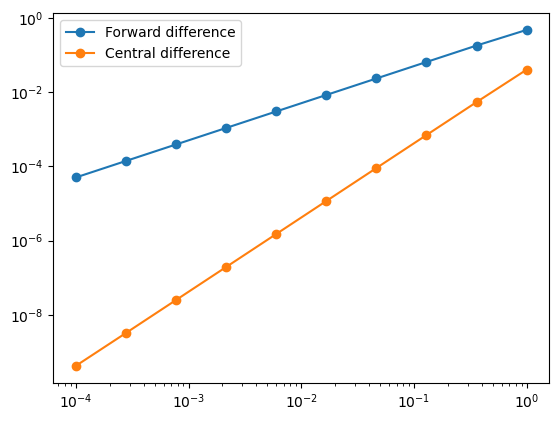

In [3]:
hvals=np.logspace(0,-4,num=10)

errf=[]; errm=[]
for h in hvals:
  xf,_,yd=fdiff(f,[-pi,pi],h)
  xm=xf+h/2
  errf.append(max(abs(yd-fp(xf))))
  errm.append(max(abs(yd-fp(xm))))

plt.loglog(hvals,errf,'-o', label='Forward difference')
plt.loglog(hvals,errm,'-o', label='Central difference')
plt.legend()
plt.show()


The gradient of the line gives the estimated order of the truncation error, $n$. As expected, we find that forward difference method has a first order error relationship and central difference method has a quadratic order error relationship.

In [4]:
from numpy import log, polyfit
# Fitting degree 1 polynomial
pf = polyfit(log(hvals), log(errf), 1)[0]
pm = polyfit(log(hvals), log(errm), 1)[0]

### Practical implementation

In the above demonstration we estimated the derivative at locations $x_{k+1/2}$, whilst what we generally want is to estimate the derivative at $x_k$. For this, we return to formula {eq}`central1a`, which can be implemented as follows:

In [5]:
def cdiff(f,xRange,h=1e-3):
    
    #Construct datapoints (x,y=f(x))
    xmin,xmax=xRange
    start=xmin-h                 #add left exterior point
    stop =xmax+2*h               #add right exterior point
    x = np.arange(start,stop,h)
    y = f(x)

    #Apply finite difference formula
    ydiff = y[2:]-y[0:-2]       #values differing by two positions
    xdiff = x[2:]-x[0:-2]       #equivalent to 2*h
    yd = ydiff/xdiff
    
    #Datapoints of func and derivative
    return x[1:-1],y[1:-1],yd   #interior points

## Second derivative formulae

<br>

**Forward difference** (order $h$ accuracy):

The result is obtained by expanding taking $x=(x_k+2h)$,  $a=x_k$ in the Taylor expansion, and then substituting in the result for the first forward difference

```{math}
:label: forward2
\begin{align}
 y_{k+2}&=y_{k}+2hy^{\prime}_{k}+\frac{(2h)^2}{2!}y^{\prime\prime}_{k}+\frac{(2h)^3}{3!}y^{\prime\prime\prime}_k\dots \qquad \text{where } y_{k+2}=y(x_k+2h)\\
 &=y_k+2h\left[\frac{y_{k+1}-y_k}{h}-\frac{h}{2}y_k^{\prime\prime}-\frac{h^2}{6}y_k^{\prime\prime\prime}+\dots\right]+2h^2y_k^{\prime\prime}+\frac{4}{3}h^3 y_k^{\prime\prime\prime}+\dots\\
 &\Rightarrow y^{\prime\prime}_k = \frac{y_{k}-2y_{k+1}+y_{k+2}}{h^2}-hy^{\prime\prime\prime}_k+\dots
 \end{align}
 ```

The formula requires two exterior points on the forward side.

<br>

**Central difference** (order $h^2$ accuracy):

By adding the forward difference expression {eq}`forward1` to the backward difference expression {eq}`backwards1` we obtain

```{math}
:label: central2
y^{\prime\prime}_k = \frac{y_{k-1}-2y_k+y_{k+1}}{h^2} + h^2\left[-\frac{1}{12}y^{(4)}_k +\dots\right]
```

## Chapter exercise 

Taking a step size `h=1e-3`, numerically estimate the second derivative of the logistic function given in {numref}`chapex1` 

(a) using the forward difference formula,<br>
(b) using the central difference formula.

You will need to extend the function estimate at *two* exterior points to obtain a result for the derivative at each point in the interval.

Plot the error in each of your estimates, given that the analytic result satisfies
\begin{equation}
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = \frac{r^2 x(C-x)(C-2x)}{C^2}.
\end{equation}

Write a short explanation of your findings.